<a href="https://colab.research.google.com/github/peter-lang/ml-tutorial/blob/master/02_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Basics

### Number of neurons in human brain $ \approx 10^{11} $ (100 billion)
### 1 Nueron connects to $ \approx 10^4 $(10 thousand)
### Number of neural connections: $ \approx 10^{15} $ (1 thousand-trillion)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png">


<img src="https://drive.google.com/uc?export=view&id=1KDtsK2TVlA3DYRgCoynm0FUE1C8ivK-C">


| Species    | Number of synapses  | Memory (float32) |
|------------|---------------------| ---------------- |
| RoundWorm (fonalféreg) |  $ 10^{5} $ | 400 KB |
| FruitFly (muslica) |  $ 10^{7} $ | 40 MB |
| NeuralNets |  $ 10^{5}-10^{9} $ | 400 KB - 4 GB |
| Bee |  $ 10^{9} $ | 4 GB |
| Mouse |  $ 10^{12} $ | 4 TB |
| Cat |  $ 10^{13} $ | 40 TB|
| Human |  $ 10^{15} $ | 4 EB |


# Gradient Descent

### Training sample: $(\mathbf{X}, \mathbf{D})$

### Net parameters: $\theta$

$\mathbf{Y} = \mathit{Net}(\mathbf{X}, \theta)$

$\mathbf{\hat{Y}} = \mathit{Loss}(\mathbf{Y}, \mathbf{D})$

### Optimization task: $$ \underset{\theta}{\arg\min}(\mathbf{\hat{Y}}) $$

### Gradient Descent: $$ \theta_{n+1} = \theta_{n} - \alpha \nabla{\mathbf{\hat{Y}}} $$

### $$ w_{n+1}^{i} = w_n^{i} - \alpha \frac{\partial \mathit{Loss}(\mathit{Net}(\mathbf{X}, \theta), \mathbf{D})}{\partial w_n^{i}} $$

<img src="https://drive.google.com/uc?export=view&id=1n1C6lTtA0vl1dryLGauTWfMGPuVta6Rt">

### Rule of thumb

__Big steps__: jumps over local minima, but might diverge

__Small steps__: converge, but can stuck in local minima

__Learning rate schedule__:
  - Start with small steps, so learning will converge
  - __Warmup phase__: Gradually bigger steps, to walk through landscape and jump through local minima
  - After we find a "nice" place, gradually smaller steps, to find local minima in the "neighbourhood"

# Gradient Descent At Final Layer

### How to compute in general: $$ w_{n+1}^{i} = w_n^{i} - \alpha \frac{\partial \mathit{Loss}(\mathit{Net}(\mathbf{X}, \theta), \mathbf{D})}{\partial w_n^{i}} $$

### Partial Derivative $$ \frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \frac{\partial u}{\partial x} $$

### Final layer

<img src="https://drive.google.com/uc?export=view&id=13-rotnmfvdl3kq8DxbtSSzyQbYN1GTOj">


#### Linear layer: $$ \mathit{Linear}(\mathbf{x}) = \sum_j{w_j x_j} $$
#### $$ \frac{\partial \mathit{Linear}(\mathbf{x})}{\partial w_i} = \frac{\partial \sum_j{w_j x_j}}{\partial w_i} = x_i $$
#### $$ \frac{\partial \mathit{Linear}(\mathbf{x})}{\partial w_n } = \frac{\partial \sum_j{w_j x_j}}{\partial w_n} = x_n = 1 $$

#### Activation function: $$\varphi(x) = \frac{1}{1+e^{-x}}$$
#### $$ \frac{\partial \varphi}{\partial x} = \varphi(x)(1-\varphi(x)) $$

#### Loss function: $$ \mathit{Loss}(y, d) = \frac{1}{2} (y-d)^2 $$
#### $$ \frac{\partial \mathit{Loss}(y, d)}{\partial y} = \frac{1}{2} 2 (y-d) = y - d $$

#### Compound function: $$ \frac{\partial \mathit{Loss}(\varphi(\mathit{Linear}(\mathbf{x})))}{\partial w_i} = \underbrace{\frac{\partial \mathit{Loss}(\varphi(\mathit{Linear}(\mathbf{x}))}{\partial \varphi(\mathit{Linear}(\mathbf{x}))}}_{\varphi(\mathit{Linear}(\mathbf{x})) - d} 
\underbrace{\frac{\partial \varphi(\mathit{Linear}(\mathbf{x}))}{\partial \mathit{Linear}(\mathbf{x})}}_{\varphi(\mathit{Linear}(\mathbf{x}))(1-\varphi(\mathit{Linear}(\mathbf{x})))} 
\underbrace{\frac{\partial \mathit{Linear}(\mathbf{x})}{\partial w_i}}_{x_i}$$

#### BUT! $ \varphi(\mathit{Linear}(\mathbf{x})) = \mathit{Net}(\mathbf{x}, \theta) = y $ was already computed during __FORWARD PATH__

#### $$ \frac{\partial \mathit{Loss}(\mathit{Net}(\mathbf{x}, \theta), d)}{\partial w_i} = (y - d)y(1-y)x_i $$

#### Let's also save this for later usage, also known as __BACKWARD PATH__ :)

#### $$ \delta =  \frac{\partial \mathit{Loss}(y, d)}{\partial \mathit{Linear}(\mathbf{x})} = (y - d)y(1-y)$$


# Gradient Descent at any place

<img src="https://drive.google.com/uc?export=view&id=1yNyUDqz4pqNDSWurzgRuUp56SaFv8V2l">


## Lessons learnt
- __FORWARD PATH__:
  - Needed to compute $ Loss(y, d) $ function
  - Save partial results at each neuron output: $ y_i $ 
- __BACKWARD PATH__: 
  - To compute gradients with regards to every weight
  - Save partial derivative results at each neuron input: $ \delta_i $
- __Neural Nets & Backpropagation algorithm__: 
  - Given $ N $ weights (a.k.a parameters)
  - Steps: $ 2N $
    - Forward
    - Backward
  - Memory: $ 3N $
    - Original weight
    - Forward partial result
    - Backward partial result
  


# Gradient Descent at any place



In [0]:
import math
import random

# Activations

class Identity:
  def __init__(self):
    self.diff_value = 1

  def __call__(self, x):
    return x

class Sigmoid:
  def __init__(self):
    self.diff_value = None

  def __call__(self, x):
    value = 1 / (1 + math.exp(-x))
    self.diff_value = value * (1-value)
    return value
  
class ReLU:
  def __init__(self):
    self.diff_value = None
    
  def __call__(self, x):
    value = max(0, x)
    self.diff_value = 1 if x > 0 else 0
    return value

class TanH:
  def __init__(self):
    self.diff_value = None
    
  def __call__(self, x):
    value = math.tanh(x)
    self.diff_value = 1 - value**2
    return value

# Loss functions

class MSE:
  def __init__(self):
    self.diff_value = None

  def set_d(self, d):
    self.d = d

  def __call__(self, y, d):
    self.diff_value = y-d
    return 0.5*(y-d)**2

# Weight initializers

def zero_init():
  return 0

class random_init:
  def __init__(self, min_value, max_value):
    self.min_value = min_value
    self.max_value = max_value

  def __call__(self):
    return random.uniform(self.min_value, self.max_value)

# Network elements

class Input:
  def __init__(self, value=None):
    self.forward_value = value

  def set_x(self, x):
    self.forward_value = x


class Neuron:
  def __init__(self, activation_fn=None, weight_init_fn=None, use_bias=False):
    self.activation_fn = activation_fn
    self.weight_init_fn = weight_init_fn
    self.use_bias = use_bias
    
    self.weights = None
    self.idx = None
    self.fan_in = None
    self.fan_out = None

    self.backprop_value = None
    self.forward_value = None

  def forward(self):
    linear_out = sum(w * n.forward_value for w, n in zip(self.weights, self.fan_in))
    self.forward_value = self.activation_fn(linear_out)
    return self.forward_value

  def backprop(self, learning_rate, loss_diff=None):
    if self.fan_out is None:
      self.backprop_value = self.activation_fn.diff_value * loss_diff
    else:
      self.backprop_value = sum(n.weights[self.idx] * n.backprop_value for n in self.fan_out) * self.activation_fn.diff_value

    for i in range(len(self.weights)):
      self.weights[i] -= learning_rate * self.fan_in[i].forward_value * self.backprop_value
      
  def connect_to_prev(self, idx, prev_layer):
    self.idx = idx
    if self.use_bias:
      self.fan_in = prev_layer + [Input(1.)]
    else:
      self.fan_in = prev_layer
    self.weights = [self.weight_init_fn() for _ in range(len(self.fan_in))]


class Net:
  def __init__(self, layers, input_dim):
    self.inputs = [Input() for _ in range(input_dim)]
    self.layers = layers
    for prev_layer, next_layer in zip([self.inputs] + self.layers[:-1], self.layers):
      for n in prev_layer:
        n.fan_out = next_layer
      for idx, n in enumerate(next_layer):
        n.connect_to_prev(idx, prev_layer)

  def __call__(self, x):
    for inp, x_value in zip(self.inputs, x):
      inp.set_x(x_value)
    for layer in self.layers:
      for neuron in layer:
        neuron.forward()
    return [neuron.forward_value for neuron in self.layers[-1]] 

  def gradient_descent(self, loss_diff, lr=1e-3):
    it = iter(reversed(self.layers))
    last_layer = next(it)
    for neuron in last_layer:
      neuron.backprop(lr, loss_diff)
    for layer in it:
      for neuron in layer:
        neuron.backprop(lr)


In [0]:
def linspace(min_val, max_val, step):
  return [min_val+x/step*(max_val-min_val) for x in range(step+1)]

real_x = linspace(-math.pi, math.pi, 50)
real_y = [math.sin(x) for x in real_x]

train_x = [random.uniform(-math.pi, math.pi) for _ in range(50)]
train_y = [math.sin(x) + random.gauss(0, 0.1) for x in train_x]

predict_x = linspace(-math.pi, math.pi, 50)


In [0]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

%matplotlib inline

def draw_plot():
  clear_output()
  predict_y = [net([x])[0] for x in predict_x]
  _ = plt.plot(real_x, real_y, train_x, train_y, 'ro', predict_x, predict_y, 'g--')
  plt.show()
  time.sleep(1.)

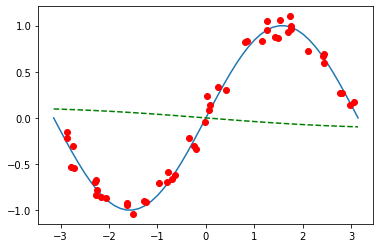

In [9]:
loss = MSE()
init = random_init(-0.2, 0.2)
net = Net([
  [Neuron(activation_fn=TanH(), weight_init_fn=init) for _ in range(50)],
  [Neuron(activation_fn=TanH(), weight_init_fn=init) for _ in range(20)],
  [Neuron(activation_fn=Identity(), weight_init_fn=init)]
], 1)

draw_plot()

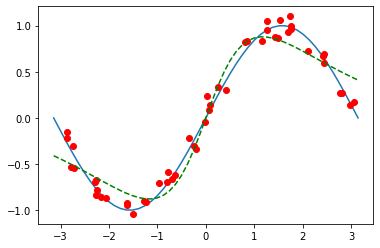

In [11]:
for epoch in range(100):
  
  train_samples = list(zip(train_x, train_y))
  random.shuffle(train_samples)
  total_loss = 0
  for x, d in train_samples:
    y = net([x])[0]
    total_loss += loss(y, d)
    net.gradient_descent(loss.diff_value, 1e-2)
  if epoch % 10 == 0:
    draw_plot()
  